# Overview of needed libraries and modules

- The main framework for working with graphs and predictions on them is [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/). It contains various methods for Deep Learning on graphs. 
- Netoworkx and matplotlip will be used for data visualization.

In [ ]:
# !pip install torch_geometric

import torch
import torch_geometric
from torch_geometric.datasets import Planetoid
import random
import numpy as np
import matplotlib.pyplot as plt

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)


## Dataset Loading
Pytorch Geometric has a separate module for datasets. There are several common datasets for GNNs: KarateClub (social network of a university karate club, contains 34 club members (nodes) and a record of who socialized with whom outside of the class (edges) right before the formal split of the club), TUDataset (a collection of benchmark datasets for graph classification and regression), Planetoid that will be used int his notebook.

`Cora` - one of the citation network datasets from Planetoid. It is a network of 2,708 machine-learning papers, organized into seven distinct classes. These papers are interlinked by 5,429 citations, forming a directed graph that maps out how papers cite each other. Feature vector of each paper is represented by a binary word vector (001001...), derived from a dictionary of 1,433 unique words, indicating the **presence or absence** of specific words in the paper. It can be applied in a wide range of tasks in terms of GNNs:
- Node classification: prediction of a node's class (paper theme)
- Link prediction: determine wheter there might be a connection between 2 nodes
- Clustering: combine nodes into groups with similar properties.

Cora's labels:

| Class name  | Number of Nodes   | Label   | 
|---|---|---|
| Neural Networks  | 818   | 3   |  
| Probabilistic Methods  | 426   |4   | 
|  Genetic Algorithm | 418  | 2  |  
| Theory | 351 | 0|
|Case Based|298|5|
|Reinforcement Learning|217|1|
|Rule Learning|180|6|



In [2]:
dataset = Planetoid(root='./CoraData', name='Cora')
cora = dataset[0]

Processing...
Done!


In [3]:
print(f'Nodes number: {cora.num_nodes}')
print(f'Edges number: {cora.num_edges}')
print(f'Dataset has isolated nodes: {cora.has_isolated_nodes()}')
print(f'Dataset has self-loops: {cora.has_self_loops()}')
cora

Nodes number: 2708
Edges number: 10556
Dataset has isolated nodes: False
Dataset has self-loops: False


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

Create dictionaries mapping classes to labels and back

In [20]:
class_to_label = {'Neural Networks': 3,
           'Probabilistic Methods': 4, 
           'Genetic Algorithm': 2, 
           'Theory': 0, 
           'Case Based': 5,
           'Reinforcement Learning': 1,
           'Rule Learning': 6
           }
label_to_class = {class_to_label[x]:x  for x in list(class_to_label.keys())}

## Visualize the dataset

Each color belong to a particular label

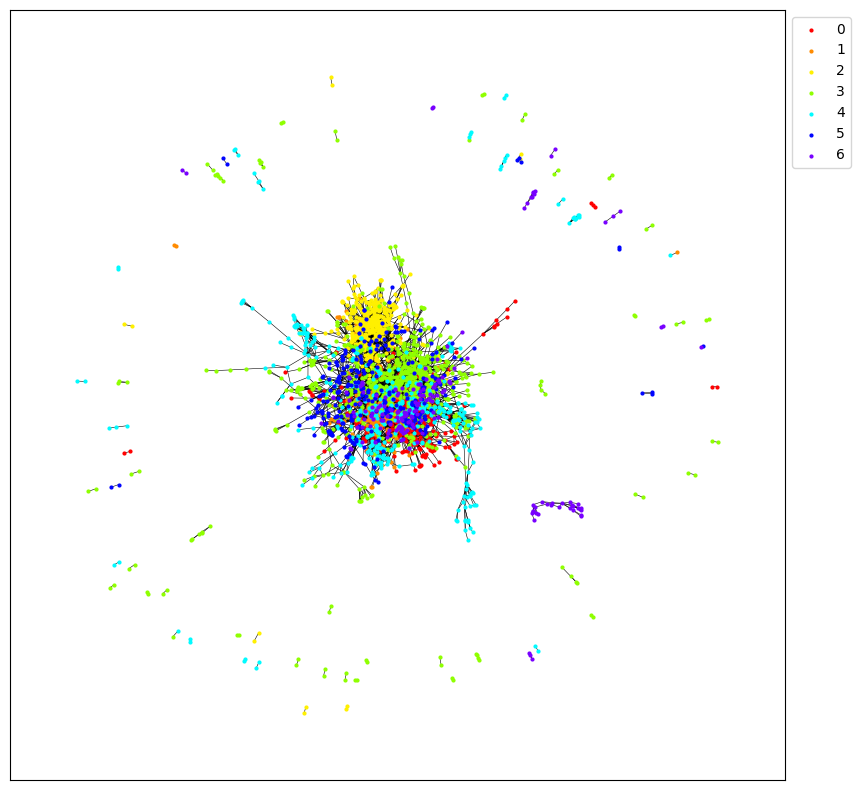

In [18]:
import networkx as nx

# convert dataset to graph representation
G = torch_geometric.utils.to_networkx(cora, to_undirected=True)

# base for building networkx graph
node_color = []
nodelist = [[], [], [], [], [], [], []]

# color list: red, orange, yellow, green, blue, dark-blue, violet 
colorlist = ['#FF0000', '#FF8B00', '#FFF000', '#8FFF00', '#00FBFF', '#0004FF', '#7800FF']

# add all points to the node list: each inner list defined by label and contains node's index
# node_color: list of colors in the same order as labels (their corresponding colors)
labels = cora.y
for order, label in enumerate(labels):
    node_color.append(colorlist[label])
    nodelist[label].append(order)

# draw graph 
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = [i for i in range(0, 7)]

for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size=4, node_color=colorlist[num], label=l)
    
nx.draw_networkx_edges(G, pos, width=0.4)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


## Lets check classes distribution

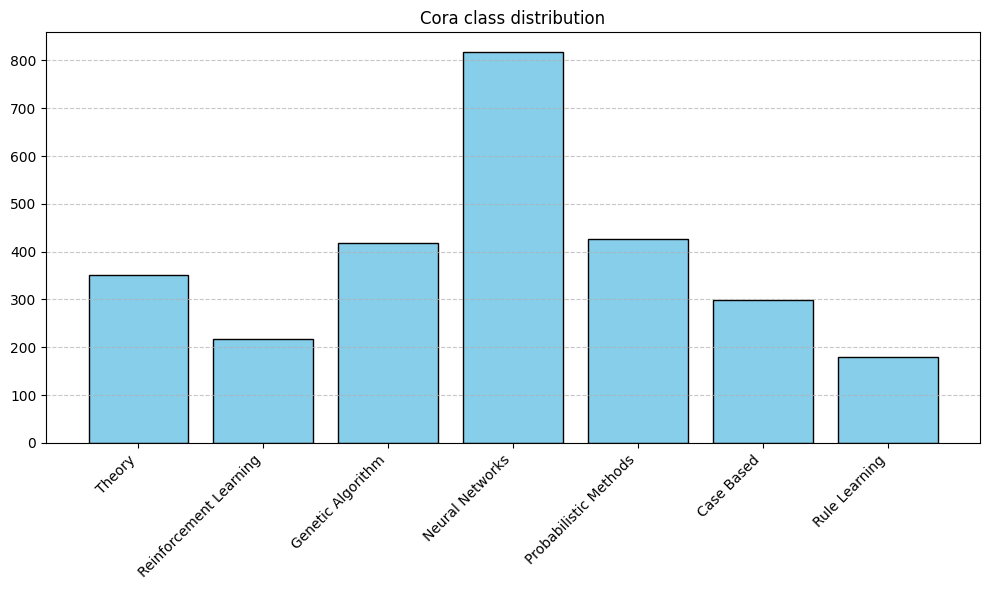

In [21]:
# sort classes names and compute appearance of each label
class_to_label_sorted = {k: v for k, v in sorted(class_to_label.items(), key=lambda item: item[1])}
class_counts = torch.bincount(cora.y.sort()[0])

plt.figure(figsize=(10, 6))
plt.bar(range(len(class_counts)), class_counts.numpy(), color='skyblue', edgecolor='black')

plt.xticks(range(len(list(class_to_label_sorted.keys()))), list(class_to_label_sorted.keys()), rotation=45, ha='right')
plt.title('Cora class distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Citeseer

`Citeseer` - another popular citation network dataset from Planetoid, is a slightly larger and more diverse dataset than Cora. It consists of 3,327 scientific papers categorized into six distinct classes, representing different topics.The citation network is formed by 4,732 directed edges, where an edge indicates a citation between two papers. Each paper is represented by a binary word vector of 3,703 unique features, derived from the presence or absence of specific words in its text.

This dataset is widely used to benchmark graph-based machine learning models, as it provides a more challenging task compared to Cora due to its higher feature dimensionality and slightly sparser connections. It also can be applied in a wide range of tasks as Cora.


**Citeseer’s labels:**
|Class Name|	Number of Nodes|	Label|
|----------|-------------------|----------|
|Agents|	920|	0|
Artificial Intelligence|	677|	1
Database	|532|	2
Information Retrieval|	590|	3
Machine Learning	|369|	4
Human-Computer Interaction|	239|	5

## Loading

In [7]:
dataset = Planetoid(root='./CiteseerData', name='Citeseer')
citeseer = dataset[0]
citeseer

Processing...
Done!


Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

In [8]:
print(f'Nodes number: {citeseer.num_nodes}')
print(f'Edges number: {citeseer.num_edges}')
print(f'Dataset has isolated nodes: {citeseer.has_isolated_nodes()}')
print(f'Dataset has self-loops: {citeseer.has_self_loops()}')

Nodes number: 3327
Edges number: 9104
Dataset has isolated nodes: True
Dataset has self-loops: False


In [22]:
class_to_label = {'Agents': 0,
           'AI': 1, 
           'DB': 2, 
           'IR': 3, 
           'ML': 4,
           'HCI': 5,
           }
label_to_class = {class_to_label[x]:x  for x in list(class_to_label.keys())}

## Visualization

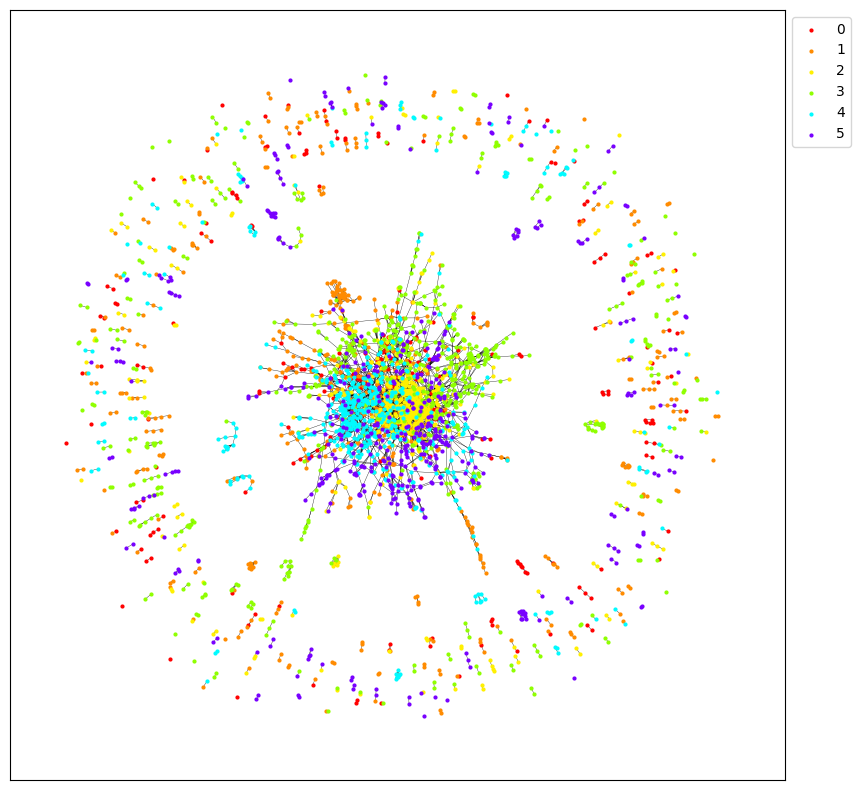

In [ ]:
import networkx as nx

# convert dataset to graph representation
G = torch_geometric.utils.to_networkx(citeseer, to_undirected=True)

# base for building networkx graph
node_color = []
nodelist = [[], [], [], [], [], [], []]

# color list: red, orange, yellow, green, blue, violet 
colorlist = ['#FF0000', '#FF8B00', '#FFF000', '#8FFF00', '#00FBFF', '#7800FF']

# add all points to the node list: each inner list defined by label and contains node's index
# node_color: list of colors in the same order as labels (their corresponding colors)
labels = citeseer.y
for order, label in enumerate(labels):
    node_color.append(colorlist[label])
    nodelist[label].append(order)

# draw graph 
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = [i for i in range(0, 6)]

for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size=4, node_color=colorlist[num], label=l)
    
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


## Classes dictribution

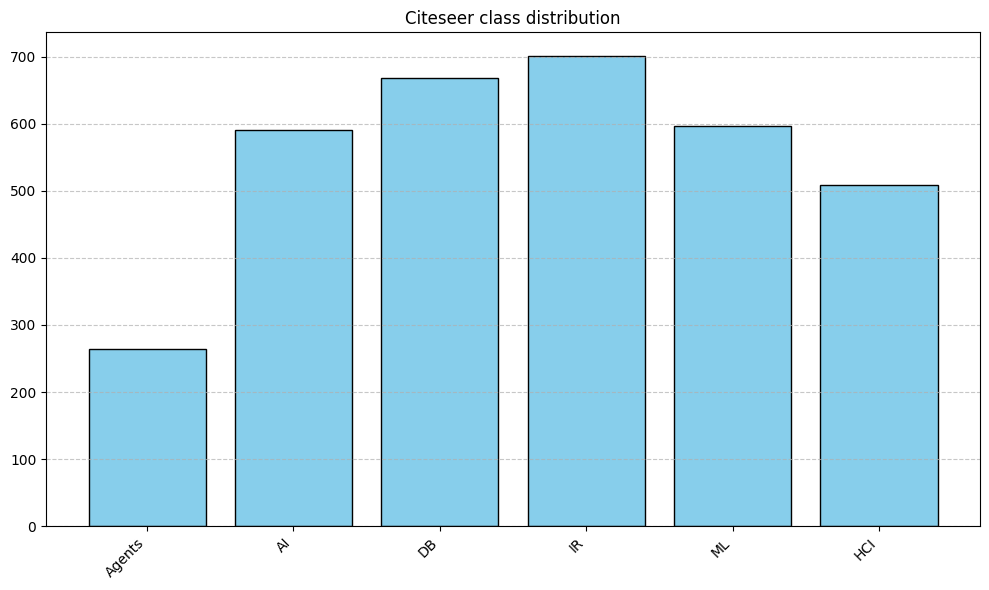

In [23]:
class_to_label_sorted = {k: v for k, v in sorted(class_to_label.items(), key=lambda item: item[1])}
class_counts = torch.bincount(citeseer.y.sort()[0])

plt.figure(figsize=(10, 6))
plt.bar(range(len(class_counts)), class_counts.numpy(), color='skyblue', edgecolor='black')

# Add class labels on the x-axis
plt.xticks(range(len(list(class_to_label_sorted.keys()))), list(class_to_label_sorted.keys()), rotation=45, ha='right')
plt.title('Citeseer class distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Datasets can be organized from other packages since they are widely used:

In [ ]:
# # Using DGL
# from dgl.data import CoraGraphDataset
# dataset = CoraGraphDataset()
# graph = dataset[0]

# Using your own files
# import networkx as nx
# import pandas as pd
# edges = pd.read_csv('cora.cites', sep='\t', header=None, names=['target', 'source'])
# nodes = pd.read_csv('cora.content', sep='\t', header=None)
# G = nx.from_pandas_edgelist(edges, 'source', 'target', create_using=nx.DiGraph())
# for i, row in nodes.iterrows():
#     G.nodes[row[0]].update({'feature': row[1:-1].values, 'label': row[-1]})